In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('train.csv')
train_data.shape

(100000, 12)

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Data Dictionary 
-----------------------

Variable    |  Definition                                | Key
----------- | ------------------------------------------ | -------------
survival    |  Survival                                  | 	0 = No, 1 = Yes
pclass      |  Ticket Class                              | 	1 = 1st, 2 = 2nd, 3 = 3rd
sex         |  Sex                                       |
Age         |  Age of years                              |
sibsp       | # of siblings / spouses aboard the Titanic |
parch       | # of parents / children aboard the Titanic |
ticket      | 	Ticket number                            |
fare        | 	Passenger fare                           |
cabin       | 	Cabin number                             |
embarked    | 	Port of Embarkation                      | 	C = Cherbourg, Q = Queenstown, S = Southampton

## Train Data

In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
new_train_data = train_data.drop(['PassengerId','Ticket','Cabin','Name'], axis=1)
new_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,male,NaN,2,0,27.14,S
1,0,3,male,NaN,0,0,13.35,S
2,0,3,male,0.33,1,2,71.29,S
3,0,3,male,19.00,0,0,13.04,S
4,1,3,male,25.00,0,0,7.76,S


In [6]:
new_train_data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age         3292
SibSp          0
Parch          0
Fare         134
Embarked     250
dtype: int64

### Age

In [7]:
new_train_data['Age'].mode()

0    25.0
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

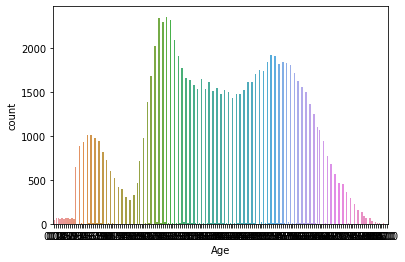

In [8]:
sns.countplot(new_train_data['Age'])

In [9]:
new_train_data['Age']=new_train_data['Age'].fillna('38')
new_train_data['Age'].isnull().sum()

0

### Fare

In [10]:
new_train_data['Fare'].mode()

0    9.27
1    9.85
dtype: float64

In [11]:
new_train_data['Fare']=new_train_data['Fare'].fillna('9.27')
new_train_data['Fare'].isnull().sum()

0

### Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

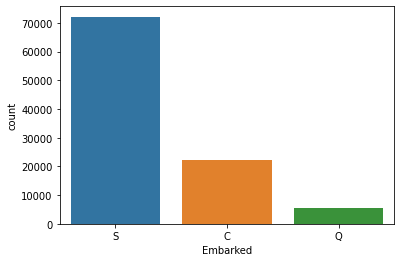

In [12]:
sns.countplot(new_train_data['Embarked'])

In [13]:
new_train_data['Embarked']=new_train_data['Embarked'].fillna('S')
new_train_data['Embarked'].isnull().sum()

0

In [14]:
new_train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
new_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,male,38,2,0,27.14,S
1,0,3,male,38,0,0,13.35,S
2,0,3,male,0.33,1,2,71.29,S
3,0,3,male,19,0,0,13.04,S
4,1,3,male,25,0,0,7.76,S


In [16]:
new_train_data['Sex'].replace('female',1 ,inplace=True)
new_train_data['Sex'].replace('male',0, inplace=True)

In [17]:
new_train_data['Embarked'].replace('S',0 ,inplace=True)
new_train_data['Embarked'].replace('C',1, inplace=True)
new_train_data['Embarked'].replace('Q',2, inplace=True)

In [18]:
new_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38,2,0,27.14,0
1,0,3,0,38,0,0,13.35,0
2,0,3,0,0.33,1,2,71.29,0
3,0,3,0,19,0,0,13.04,0
4,1,3,0,25,0,0,7.76,0


In [19]:
new_train_data['Family']=new_train_data['SibSp']+new_train_data['Parch']
new_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,1,0,38,2,0,27.14,0,2
1,0,3,0,38,0,0,13.35,0,0
2,0,3,0,0.33,1,2,71.29,0,3
3,0,3,0,19,0,0,13.04,0,0
4,1,3,0,25,0,0,7.76,0,0


In [20]:
new_train_data_1=new_train_data.drop(['SibSp','Parch'], axis=1)
new_train_data_1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,1,0,38,27.14,0,2
1,0,3,0,38,13.35,0,0
2,0,3,0,0.33,71.29,0,3
3,0,3,0,19,13.04,0,0
4,1,3,0,25,7.76,0,0


## Test Data

In [21]:
test_data=pd.read_csv('test.csv')
test_data.shape

(100000, 11)

In [22]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


In [23]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
new_test_data = test_data.drop(['Ticket','Cabin','Name'], axis=1)
new_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,100000,3,male,19.0,0,0,63.01,S
1,100001,3,female,53.0,0,0,5.81,S
2,100002,1,female,19.0,0,0,38.91,C
3,100003,2,male,25.0,0,0,12.93,S
4,100004,1,female,17.0,0,2,26.89,C


In [25]:
new_test_data.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age            3487
SibSp             0
Parch             0
Fare            133
Embarked        277
dtype: int64

### Age

In [26]:
new_test_data['Age'].mode()

0    22.0
dtype: float64

In [27]:
new_test_data['Age']=new_test_data['Age'].fillna('22')
new_test_data['Age'].isnull().sum()

0

### Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

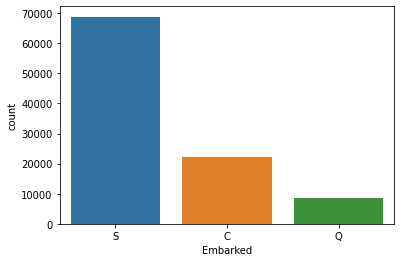

In [29]:
sns.countplot(new_test_data['Embarked'])

In [30]:
new_test_data['Embarked']=new_test_data['Embarked'].fillna('S')
new_test_data['Embarked'].isnull().sum()

0

### Fare

In [57]:
new_test_data['Fare'].mode()

0    10.39
dtype: object

In [32]:
new_test_data['Fare']=new_test_data['Fare'].fillna('10.39')
new_test_data['Fare'].isnull().sum()

0

In [33]:
new_test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [34]:
new_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,100000,3,male,19,0,0,63.01,S
1,100001,3,female,53,0,0,5.81,S
2,100002,1,female,19,0,0,38.91,C
3,100003,2,male,25,0,0,12.93,S
4,100004,1,female,17,0,2,26.89,C


In [36]:
new_test_data['Sex'].replace('female',1 ,inplace=True)
new_test_data['Sex'].replace('male',0, inplace=True)

In [37]:
new_test_data['Embarked'].replace('S',0 ,inplace=True)
new_test_data['Embarked'].replace('C',1, inplace=True)
new_test_data['Embarked'].replace('Q',2, inplace=True)

In [38]:
new_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,100000,3,0,19,0,0,63.01,0
1,100001,3,1,53,0,0,5.81,0
2,100002,1,1,19,0,0,38.91,1
3,100003,2,0,25,0,0,12.93,0
4,100004,1,1,17,0,2,26.89,1


In [39]:
new_test_data['Family']=new_test_data['SibSp']+new_test_data['Parch']
new_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,100000,3,0,19,0,0,63.01,0,0
1,100001,3,1,53,0,0,5.81,0,0
2,100002,1,1,19,0,0,38.91,1,0
3,100003,2,0,25,0,0,12.93,0,0
4,100004,1,1,17,0,2,26.89,1,2


In [40]:
new_test_data_1=new_test_data.drop(['SibSp','Parch'], axis=1)
new_test_data_1.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,100000,3,0,19,63.01,0,0
1,100001,3,1,53,5.81,0,0
2,100002,1,1,19,38.91,1,0
3,100003,2,0,25,12.93,0,0
4,100004,1,1,17,26.89,1,2


In [41]:
print(new_train_data_1.shape)
print(new_test_data_1.shape)

(100000, 7)
(100000, 7)


In [42]:
X_train = new_train_data_1.drop("Survived", axis=1)
Y_train = new_train_data_1["Survived"]
X_test  = new_test_data_1.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((100000, 6), (100000,), (100000, 6))

## C-Support Vector Classification.

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [44]:
model_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model_svc.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [45]:
pred_svc=model_svc.predict(X_test)
svc_score =model_svc.score(X_train,Y_train)
svc_pred_score =round(svc_score*100,2)
svc_pred_score

76.92

In [53]:
result = pd.DataFrame({
       "PassengerId": new_test_data["PassengerId"],
       "Survived":pred_svc
   })

In [54]:
result.to_csv('result.csv', index = False)

In [55]:
result_csv=pd.read_csv('result.csv')
result.shape

(100000, 2)

In [52]:
sample_data= pd.read_csv('sample_submission.csv')
sample_data.shape

(100000, 2)